In [1]:
import pandas as pd
from lab_4_functions import word_plotter

In [2]:
df = pd.read_csv('BBC News Train.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


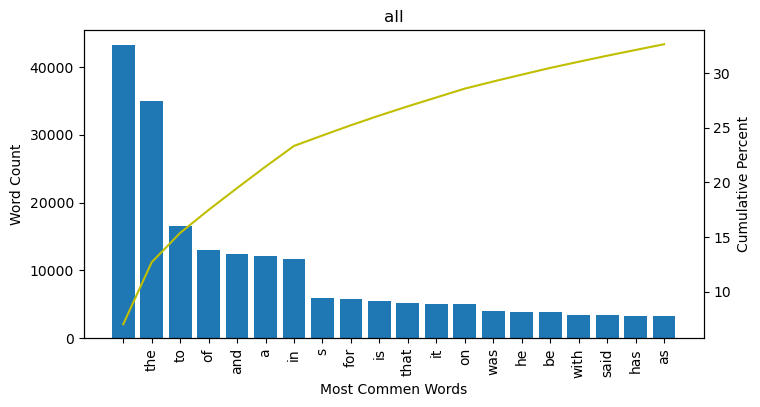

In [3]:
word_plotter(df, num_words = 20)

In [4]:
from sklearn.feature_extraction import text
filter_words = list(text.ENGLISH_STOP_WORDS)
train_filter_words = filter_words + ['', 's', 'said', '-', 'said.', '.', 'mr', 't', 'year','new', 'just', 'best', 'like',
                'said:', 'way', 'use', 'say', 'including', 'set', 'used', 'o', 'people', 'm', 'uk', 
                'brown', 'told', 'time', 'make', 'number', 'good', 'says', 'years', 'won']

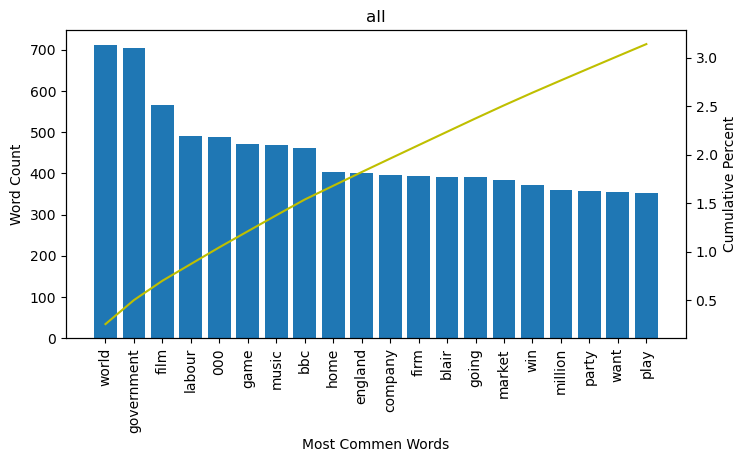

In [6]:
word_plotter(df, num_words = 20, filter_words = train_filter_words)

In [ ]:
for cat in df.Category.unique():
    word_ploter(df, num_words = 10, filter_words = train_filter_words, cat = cat)#, show_words = True)

In [ ]:
df2 = pd.read_csv('BBC News Test.csv')
df2.head()

In [ ]:
word_ploter(df2, num_words = 20)

Why two filter lists?

The assignment asks "when you train the unsupervised model for matrix factorization, should you include texts (word features) from the test dataset or not as the input matrix?" I would argue no we should not include the train data in the input matrix. Since the train data isn't being classified in the unsupervised model, adding it to the matrix adds words that might not be present in the test data. That would create noise in the results and lower the accuracy. That same logic also means that we should use a new list of filter words to preprocess the test data. 

That only holds for the unsupervised model though. For the supervised model it is important to treat the test and train data the same so the train filter list will be exclusively used for the supervised models data preprocessing.


In [ ]:
test_filter_words = filter_words + ['', 's', 'said', '-', 'mr', 'people', 'new', 't', 'said.', '.', 'just', 'told', 'like', 'years', 'year',
                                   'think', 'said:', 'number', 'going', 'set', 'says', 'did', 'good']
word_ploter(df2, num_words = 20, filter_words = test_filter_words, show_words = True)

In [ ]:
# export to files
with open('train_filter_words.txt', 'w') as f:
    for word in train_filter_words:
        f.write(f"{word}\n")

with open('test_filter_words.txt', 'w') as f:
    for word in test_filter_words:
        f.write(f"{word}\n")